# Все значения времени нужно поделить на 5

### 1) Снимим доступную в данной схеме часть вольт-амперной хар-ки стабилитрона с сопротивлением r = 5.2 кОм, при возрастании и убывании напряжения V. 
Стараемся максимально точно определить потенциалы зажигания V1 и гашения V2 лампы. А также соответствующие им токи I1, I2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prepare_plot(name_x, name_y):
    fig, ax = plt.subplots(figsize = (8, 5))
    ax.minorticks_on()
    ax.grid(which = 'major')
    ax.grid(which = 'minor', linestyle = ':')
    ax.set_xlabel(name_x)
    ax.set_ylabel(name_y)
    return ax

def drow_graph(ax_cur, x, y, x_err, y_err, line_color):
    ax_cur.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', color=line_color)

def drow_line(ax_cur, x, y, x_err, y_err, line_color):
    ax_cur.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', color=line_color)
    p = np.polyfit(x, y, 1)
    ya = np.polyval(p, x)
    ax_cur.plot(x, ya, linestyle='dashed', color=line_color)
    k = (ya[1] - ya[0]) / (x[1] - x[0])
    print(k, '(' + line_color + ')')

In [3]:
df = pd.DataFrame()

v_up = "v_up" # V
i_up = "i_up" # A
v_down = "v_down" # V
i_down = "i_down" # A

data_up = [(0.01, 0.01), (8.6, 0.012), (12.2, 0.013), (18.9, 0.013), (21.5, 0.013), (40, 0.015), (60, 0.017), (77.6, 0.018), (88.32, 3.08), (91.62, 3.72), \
   (94.1, 4.216), (97.57, 4.846)]      # Растем
# bad values from data_up: (90.55, 0.020), (96.30, 0.020)
data_down = [(92.84, 3.976), (88.91, 3.22), (86.27, 2.71), (84.75, 2.45), (83.3, 0.019)]    # Падаем

df[v_up], df[i_up] = np.array([i[0] for i in data_up]), np.array([i[1] for i in data_up])

df[v_down] = np.array([i[0] for i in data_down] + [float('NaN')] * (len(data_up) - len(data_down)))
df[i_down] = np.array([i[1] for i in data_down] + [float('NaN')] * (len(data_up) - len(data_down)))


df

,v_up,i_up,v_down,i_down
0,0.01,0.010,92.84,3.976
1,8.60,0.012,88.91,3.220
2,12.20,0.013,86.27,2.710
3,18.90,0.013,84.75,2.450
4,21.50,0.013,83.30,0.019
5,40.00,0.015,NaN,NaN
6,60.00,0.017,NaN,NaN
7,77.60,0.018,NaN,NaN
8,88.32,3.080,NaN,NaN
9,91.62,3.720,NaN,NaN


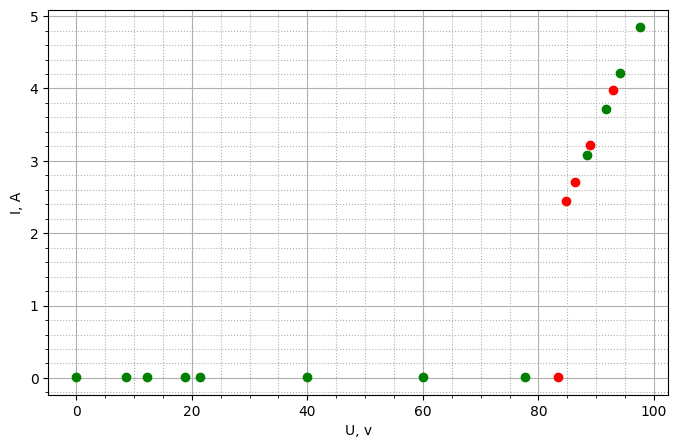

In [4]:
ax_1 = prepare_plot("U, v", "I, A")
drow_graph(ax_1, df[v_up], df[i_up], 0, 0, "green")
drow_graph(ax_1, df[v_down], df[i_down], 0, 0, "red")

### 2) Соберем установку с параметрами С = 50 нФ, магазин сопротивлений R = 900 кОм. 
Подключим осциллограф в измерительном режиме, выходное напряжение U = 1.2*V1.

+1) Оценить соотношение времен зарядки и разрядки $t_z$, $t_r$.

$t_z = 22 * 10 \ mSec$

$t_r = 1 * 10 \ mSec$

$t_z/t_r = 22$

+2) Сфоткать картину осциллографа.

3) По масштабу осцилограммы оценить T = $t_z$ + $t_r$ = $23 * 10\ mSec = 230\ mSec$

$\nu$ = 1/T

## Действия:
Уменьшая сопротивление магазина R, определим $R_{kr}$, при котором пропадают колебания

$R_{kr} = 192\ kOm$

1) При R = 650 kOm, проведем серию измерений $\nu(C)$, where C is changing from 50 нФ до 2 нФ, поддерживая U постоянным.
2) Аналогично серия измерений $\nu(R)$ при C = 50 нФ, меняя R от макс до критического при постоянном напряжении U

In [5]:
import math
# нФ mSec
data_2 = [(50, 32 * 5), (44, 28.5 * 5), (38, 25 * 5), (32, 21 * 5), (26, 17 * 5), (20, 32 * 2), (18, 29 * 2), (12, 18 * 2), (4, 21 * 0.5)]

# kOm mSec
data_3 = [(900, 24 * 10), (800, 41 * 5), (700, 18 * 10), (600, 30 * 5), (500, 26 * 5), (400, 21 * 5), (300, 16 * 5), (200, 25 * 2)]

ct = pd.DataFrame()
c, t = "C, mF", "t, sec"
t_teor = "t_teor, sec"
rt = pd.DataFrame()
r = "R, Om"

ct[c] = [i[0] for i in data_2]
ct[t] = [i[1] for i in data_2]
ct[t_teor] = [i[0] * 650000 * math.log()  for i in data_2]

rt[r] = [i[0] for i in data_3]
rt[c] = [i[1] for i in data_3]

